## DANE

In [46]:
using LinearAlgebra, Plots, PrettyTables

n = 100 # liczba punktów dyskretyzacji
k = 4
m = 1
A = -4π
B = 3π
x = collect(range(A, B, length=n))
y = exp.(-k*sin.(m*x)) .+ k*sin.(m*x) .- 1

100-element Vector{Float64}:
 0.0
 0.2955101479039626
 0.8983927537470455
 1.5569981364562335
 2.149428943323952
 2.611740206757437
 2.9077479978173435
 3.0178213736344306
 2.9351461507183334
 2.6648189977781547
 ⋮
 2.9351461507183343
 3.0178213736344306
 2.9077479978173435
 2.611740206757437
 2.149428943323952
 1.556998136456233
 0.8983927537470451
 0.29551014790396235
 0.0

## APROKSYMACJE

In [47]:
# aproksymacja wielomianowa
function poly_approx(n::Int, x::Vector, y::Vector)
    X = zeros(length(x), n+1)
    for i in 0:n
        X[:, i+1] = x.^i
    end
    theta = X \ y
    x_appr = range(x[1], x[end], length=100)
    y_appr = zeros(length(x_appr))
    for i in 0:n
        y_appr .+= theta[i+1] * x_appr.^i
    end
    return x_appr, y_appr
end

# aproksymacja trygonometryczna
function trig_approx(n::Int, x::Vector, y::Vector)
    X = zeros(length(x), 2n+1)
    for i in 1:n
        X[:, 2*i-1] = sin.(i*x)
        X[:, 2*i] = cos.(i*x)
    end
    X[:, end] = ones(length(x))
    theta = X \ y
    x_appr = range(x[1], x[end], length=100)
    y_appr = zeros(length(x_appr))
    for i in 1:n
        y_appr .+= theta[2*i-1] * sin.(i*x_appr) .+ theta[2*i] * cos.(i*x_appr)
    end
    y_appr .+= theta[end]
    return x_appr, y_appr
end

trig_approx (generic function with 1 method)

In [48]:
# aproksymacja wielomianowa z różnymi stopniami wielomianów
poly_x_appr = []
poly_y_appr = []
poly_errors = []
for i in 1:10
    x_appr, y_appr = poly_approx(i, x, y)
    push!(poly_x_appr, x_appr)
    push!(poly_y_appr, y_appr)
    push!(poly_errors, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

# aproksymacja trygonometryczna z różnymi liczbami funkcji
trig_x_appr = []
trig_y_appr = []
trig_errors = []
for i in 1:10
    x_appr, y_appr = trig_approx(i, x, y)
    push!(trig_x_appr, x_appr)
    push!(trig_y_appr, y_appr)
    push!(trig_errors, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

## WYKRESY

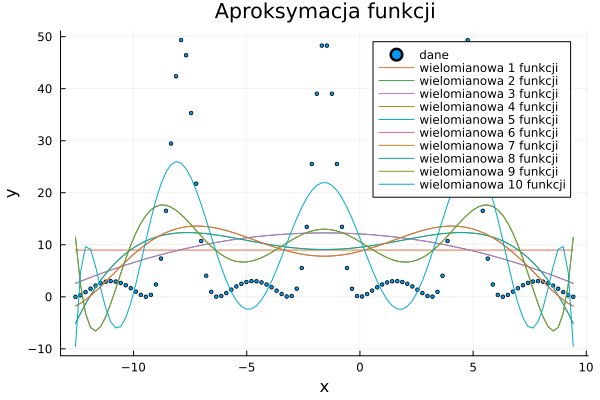

In [49]:
scatter(x, y, label="dane", markersize=2)
for i in 1:10
    plot!(poly_x_appr[i],  poly_y_appr[i], label="wielomianowa $i funkcji")
    end
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    plot!()

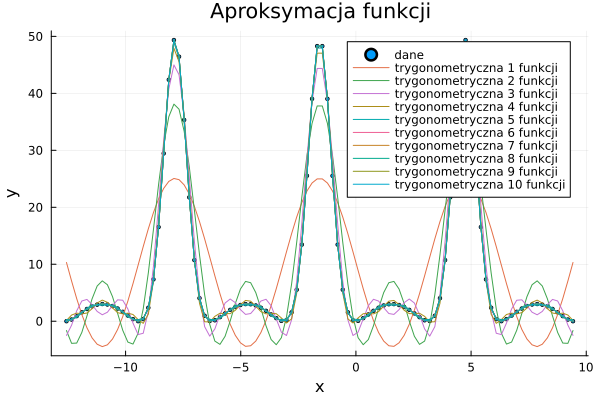

In [50]:
scatter(x, y, label="dane", markersize=2)
for i in 1:10
    plot!(trig_x_appr[i], trig_y_appr[i], label="trygonometryczna $i funkcji")
    end
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    plot!()

In [51]:
pretty_table([1:10 poly_errors trig_errors], p)

UndefVarError: UndefVarError: p not defined